In [681]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, silhouette_score
from sklearn.preprocessing import Normalizer

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [682]:
df_transaction = pd.read_csv('/content/drive/MyDrive/Case Study - Transaction.csv', delimiter=';')
df_product = pd.read_csv('/content/drive/MyDrive/Case Study - Product.csv', delimiter=';')
df_store = pd.read_csv('/content/drive/MyDrive/Case Study - Store.csv', delimiter=';')
df_customer = pd.read_csv('/content/drive/MyDrive/Case Study - Customer.csv', delimiter=';')

In [683]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

df_transaction.head()

<ipython-input-683-45d20cb5faab>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])


,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


In [684]:
df_store['Latitude'] = df_store['Latitude'].replace(',', '.', regex=True).astype('float')
df_store['Longitude'] = df_store['Longitude'].replace(',', '.', regex=True).astype('float')

df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [685]:
df_customer['Income'] = df_customer['Income'].replace(',', '.', regex=True).astype('float')

df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [686]:
df_merge = pd.merge(df_transaction, df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on='ProductID')
df_merge = pd.merge(df_merge, df_store, on='StoreID')

In [687]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [688]:
df_regresi = df_merge.groupby(['Date']).agg({
    'Qty': 'sum'
}).reset_index()

df_regresi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Qty     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [689]:
df_train, df_test = train_test_split(df_regresi, train_size=300)
df_train = df_regresi[:330]
df_test = df_regresi[330:]

print(df_train.tail())
print(df_test.head())

          Date  Qty
325 2022-11-22   49
326 2022-11-23   40
327 2022-11-24   42
328 2022-11-25   55
329 2022-11-26   40
          Date  Qty
330 2022-11-27   53
331 2022-11-28   50
332 2022-11-29   55
333 2022-11-30   45
334 2022-12-01   35


### REGRESSION

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

271.4
12.714285714285714


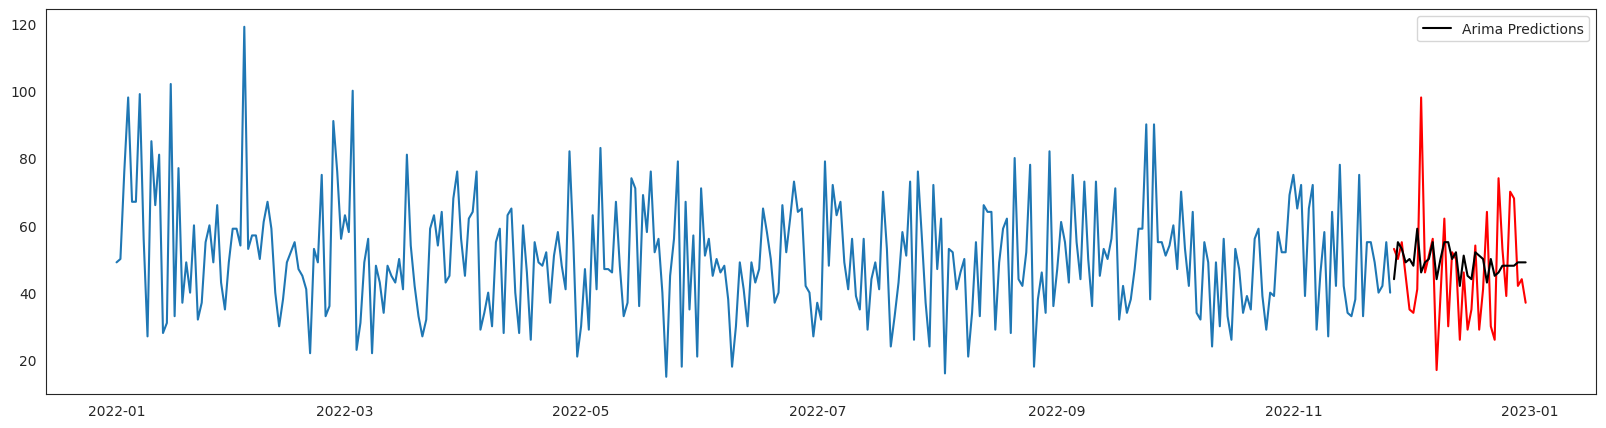

In [690]:
# ARIMA Time Series

df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

y = df_train['Qty']
model_arima = ARIMA(y, order=(40, 2,1)).fit()

y_pred = model_arima.get_forecast(len(df_test))
y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = model_arima.predict(start= y_pred_df.index[0], end= y_pred_df.index[-1])
y_pred_df.index = df_test.index

y_pred_out = y_pred_df['predictions'].round()

mae = mean_absolute_error(df_test['Qty'], y_pred_out)
rmse = mean_squared_error(df_test['Qty'], y_pred_out)
print(rmse)
print(mae)

plt.figure(figsize=(20, 5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black', label='Arima Predictions')
plt.legend()

In [691]:
store = [0]
y = df_test['Qty'].values.tolist()
x = y_pred_out.tolist()

for i in range(len(x)):
  order = 0
  store.append(0)
  store[i] = float(store[order] + x[i] - y[i])
  order+=1

store.pop()
data = {
    "Tambah Barang (prediksi)": x,
    "Penjualan (aktual)": y,
    "stok" : store
}

df = pd.DataFrame(data)
df.describe()

,Tambah Barang (prediksi),Penjualan (aktual),stok
count,35.00000,35.000000,35.000000
mean,49.20000,46.314286,-5.857143
std,3.85624,16.204160,16.334991
min,42.00000,17.000000,-61.000000
25%,47.00000,35.000000,-11.000000
50%,49.00000,45.000000,-4.000000
75%,51.00000,53.500000,5.500000
max,59.00000,98.000000,18.000000


### CLUSTERING

In [692]:
df_cluster = df_merge.groupby("CustomerID").agg({
    'TransactionID' : "count",
    'Qty' : "sum",
    'TotalAmount' : "sum"
}).reset_index()

In [693]:
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [694]:
# apply normalization techniques
scaler = Normalizer(norm='l2')

normalized_data = scaler.fit_transform(df_cluster[["TransactionID","Qty", "TotalAmount"]])

In [695]:
K = range(2,8)
fits = []
score = []

for k in K:
  model = KMeans(n_clusters = k, random_state = 0,n_init='auto').fit(normalized_data)
  fits.append(model)
  score.append(silhouette_score(normalized_data, model.labels_, metric='euclidean'))

In [696]:
print(score)

[0.5299470019092021, 0.4665300075431153, 0.4067347626228461, 0.4073111178350109, 0.37841183127396644, 0.3546381142753068]


<Axes: >

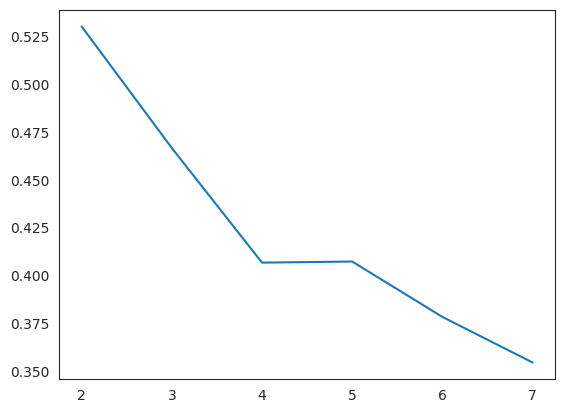

In [697]:
sns.lineplot(x = K, y=score)

In [698]:
df_cluster['cluster_label'] = fits[2].labels_

In [699]:
df_cluster_fix = df_cluster.groupby('cluster_label').agg({
    'CustomerID' : 'count',
    'TransactionID' : 'mean',
    'Qty' : 'mean',
    'TotalAmount' : 'mean'
})
df_cluster_fix

,CustomerID,TransactionID,Qty,TotalAmount
cluster_label,,,,
0,128,11.601562,40.007812,418542.187500
1,28,9.250000,35.142857,225110.714286
2,156,11.628205,42.775641,383731.410256
3,135,10.829630,40.874074,313365.925926


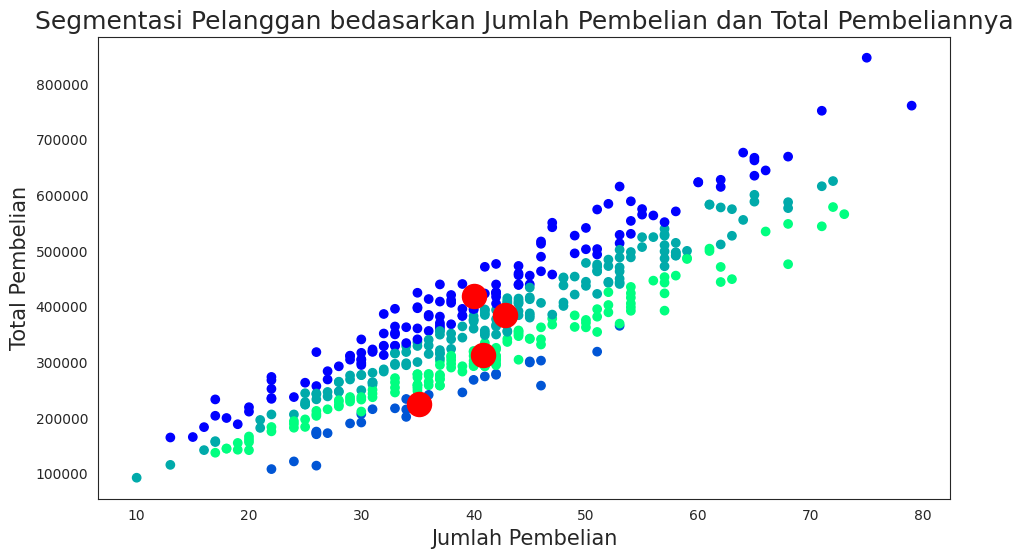

In [700]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x='Qty', y='TotalAmount', data=df_cluster,c=df_cluster['cluster_label'], cmap='winter')
plt.scatter(x= df_cluster_fix['Qty'], y=df_cluster_fix['TotalAmount'], s=300, c='red')
plt.xlabel('Jumlah Pembelian', fontsize=15)
plt.ylabel('Total Pembelian', fontsize=15)
plt.title('Segmentasi Pelanggan bedasarkan Jumlah Pembelian dan Total Pembeliannya', fontsize=18)
plt.show()